In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.11.5


In [22]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [23]:
# Carrega o dataset
df_dsa = pd.read_csv('dataset.csv')

In [24]:
df_dsa.shape

(3000, 7)

In [25]:
df_dsa.columns

Index(['valor_aluguel', 'area_m2', 'ano_construcao', 'codigo_localidade',
       'numero_banheiros', 'numero_cozinhas', 'codigo_bairro'],
      dtype='object')

In [26]:
df_dsa.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [27]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


# Análise Exploratória - Resumo Estatístico

In [28]:
# Verificar se ha valores ausentes
df_dsa.isnull().sum()

valor_aluguel        0
area_m2              0
ano_construcao       0
codigo_localidade    0
numero_banheiros     0
numero_cozinhas      0
codigo_bairro        0
dtype: int64

In [29]:
# Resumo estatistico do DataSet 
df_dsa.describe()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,1.441000,0.061333,0.042000,1173.798667
std,195.865692,23.675758,22.288136,0.545238,0.239981,0.200623,678.187690
min,40.512820,20.000000,1918.000000,1.000000,0.000000,0.000000,113.000000
25%,320.961530,51.000000,1939.000000,1.000000,0.000000,0.000000,561.750000
50%,426.897435,65.000000,1959.000000,1.000000,0.000000,0.000000,1025.000000
75%,560.282055,81.000000,1972.000000,2.000000,0.000000,0.000000,1714.000000
max,1843.384600,160.000000,1997.000000,3.000000,1.000000,1.000000,2529.000000


In [30]:
# Resumo estatistico da variavel alvo
df_dsa["valor_aluguel"].describe()

count    3000.000000
mean      459.643146
std       195.865692
min        40.512820
25%       320.961530
50%       426.897435
75%       560.282055
max      1843.384600
Name: valor_aluguel, dtype: float64

<Axes: xlabel='valor_aluguel', ylabel='Count'>

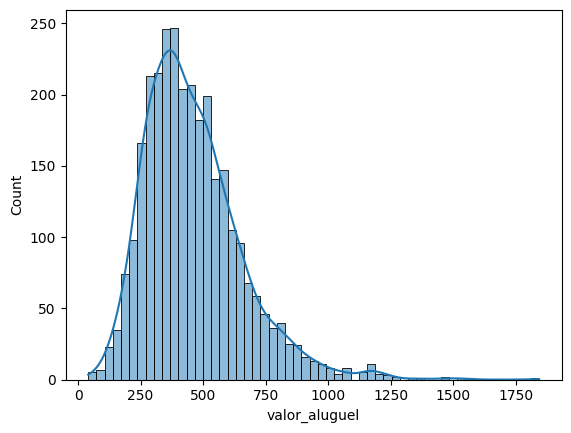

In [31]:
# Histograma da variável alvo
sns.histplot(data = df_dsa, x = "valor_aluguel", kde = True)

In [32]:
# Correlação entre variaveis 
df_dsa.corr()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
valor_aluguel,1.000000,0.584878,0.139194,0.172368,0.250261,0.170707,-0.020846
area_m2,0.584878,1.000000,-0.226581,0.110046,0.226306,0.045716,-0.089050
ano_construcao,0.139194,-0.226581,1.000000,-0.152206,0.065824,0.109881,0.327983
codigo_localidade,0.172368,0.110046,-0.152206,1.000000,0.037858,-0.004774,-0.282528
numero_banheiros,0.250261,0.226306,0.065824,0.037858,1.000000,0.064216,0.043600
numero_cozinhas,0.170707,0.045716,0.109881,-0.004774,0.064216,1.000000,0.029495
codigo_bairro,-0.020846,-0.089050,0.327983,-0.282528,0.043600,0.029495,1.000000


### O coeficiente de correlação é uma medida estatística que indica a força e a direção da relação linear entre duas variáveis numéricas. Ele varia entre -1 e 1, onde: Um coeficiente de correlação igual a 1 indica uma correlação linear perfeita positiva, ou seja, quando uma variável aumenta, a outra variável também aumenta na mesma proporção. Um coeficiente de correlação igual a -1 indica uma correlação linear perfeita negativa, ou seja, quando uma variável aumenta, a outra variável diminui na mesma proporção. Um coeficiente de correlação igual a 0 sugere que não há correlação linear entre as duas variáveis. O coeficiente de correlação mais comum é o de Pearson, que mede a correlação linear entre duas variáveis. Existem outras medidas de correlação, como o coeficiente de correlação de Spearman, que avalia a relação monotônica entre duas variáveis, e o coeficiente de correlação de Kendall, que considera a concordância entre os rankings das variáveis.

In [34]:
# Criar faixas de área
bins = [0, 30, 60, 90, 120, np.inf]
labels = ["0 - 30", "31 - 60", "61 - 90", "91 - 120", "121+"]

# Criar coluna de categorias de área
df_dsa["faixa_area"] = pd.cut(df_dsa["area_m2"], bins=bins, labels=labels)

# Agrupar por faixa de área e calcular estatísticas
tabela_analise = df_dsa.groupby("faixa_area").agg(
    media_aluguel=("valor_aluguel", "mean"),
    mediana_aluguel=("valor_aluguel", "median"),
    contagem_imoveis=("valor_aluguel", "count")
).reset_index()

# Calcular correlação entre área e valor do aluguel
correlacao = df_dsa["area_m2"].corr(df_dsa["valor_aluguel"])

# Adicionar a correlação à tabela
tabela_analise["correlacao_aluguel"] = round(correlacao, 2)

# Exibir a tabela
print(tabela_analise)


  faixa_area  media_aluguel  mediana_aluguel  contagem_imoveis  \
0     0 - 30     275.876270       280.974350               126   
1    31 - 60     364.607891       357.179470              1136   
2    61 - 90     492.957371       481.153835              1298   
3   91 - 120     631.623377       584.564100               369   
4       121+     803.475630       721.948700                71   

   correlacao_aluguel  
0                0.58  
1                0.58  
2                0.58  
3                0.58  
4                0.58  


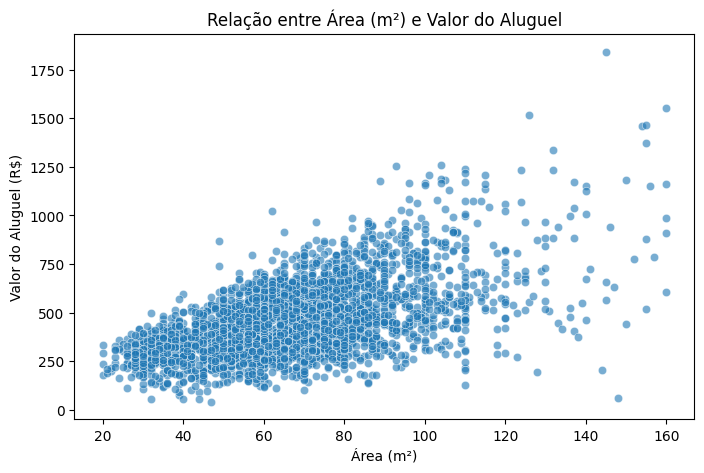

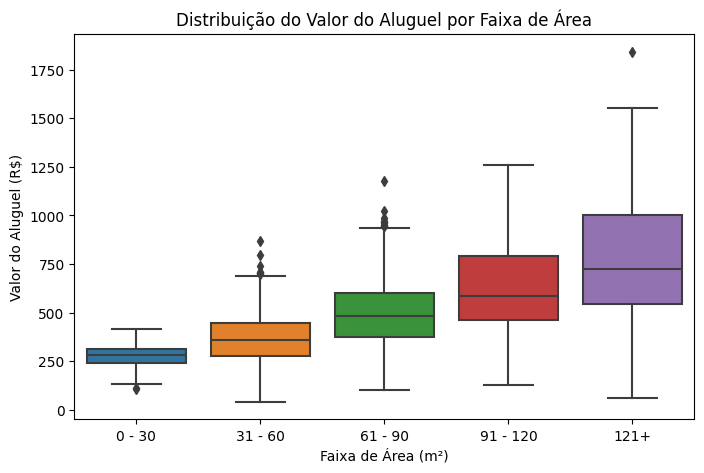

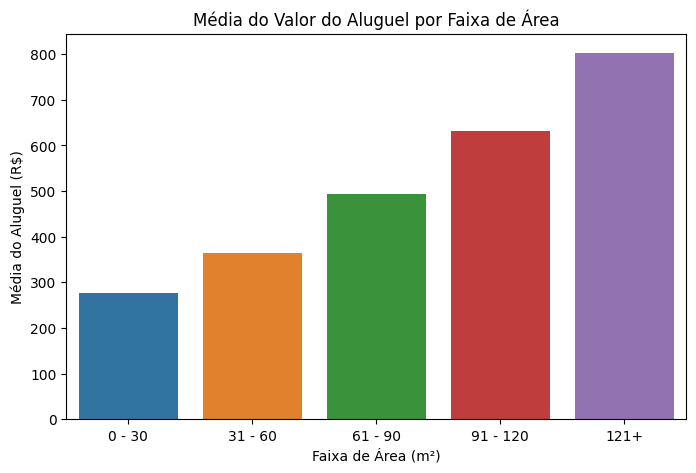

In [35]:
# analisar a relação entre a variável de entrada area_m2 e a variável alvo valor_aluguel em graficos
# Gráfico de dispersão
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_dsa, x="area_m2", y="valor_aluguel", alpha=0.6)
plt.title("Relação entre Área (m²) e Valor do Aluguel")
plt.xlabel("Área (m²)")
plt.ylabel("Valor do Aluguel (R$)")
plt.show()

# Gráfico de boxplot por faixa de área
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_dsa, x="faixa_area", y="valor_aluguel")
plt.title("Distribuição do Valor do Aluguel por Faixa de Área")
plt.xlabel("Faixa de Área (m²)")
plt.ylabel("Valor do Aluguel (R$)")
plt.show()

# Gráfico de barras com a média do aluguel por faixa de área
plt.figure(figsize=(8, 5))
sns.barplot(data=tabela_analise, x="faixa_area", y="media_aluguel")
plt.title("Média do Valor do Aluguel por Faixa de Área")
plt.xlabel("Faixa de Área (m²)")
plt.ylabel("Média do Aluguel (R$)")
plt.show()

## Regressão Linear Simples
### A Regressão Linear é uma técnica estatística utilizada para modelar a relação entre uma variável dependente (também chamada de variável resposta ou variável alvo) e uma ou mais variáveis independentes (também chamadas de variáveis explicativas ou preditoras). A Regressão Linear tem como objetivo estimar os coeficientes da equação que melhor descreve essa relação, minimizando a soma dos erros quadráticos entre os valores observados e os valores previstos pelo modelo. Existem dois tipos principais de regressão linear: Regressão Linear Simples: Neste caso, há apenas uma variável independente envolvida. A equação da Regressão Linear Simples é expressa como: Y = a + bX + ε Onde Y é a variável dependente, X é a variável independente, a é o coeficiente linear (intercepto), b é o coeficiente angular (inclinação) e ε é o erro aleatório. Regressão Linear Múltipla: Neste caso, há duas ou mais variáveis independentes envolvidas. A equação é expressa como: Y = a + b1X1 + b2X2 + ... + bnXn + ε Onde Y é a variável dependente, X1, X2, ..., Xn são as variáveis independentes, a é o coeficiente linear (intercepto), b1, b2, ..., bn são os coeficientes angulares (inclinações) e ε é o erro aleatório. A Regressão Linear é amplamente utilizada em diversas áreas, como economia, ciências sociais, biologia e engenharia, para prever resultados, avaliar relações causais e identificar fatores que contribuem para um fenômeno específico. Além disso, é uma técnica fundamental para a análise de dados e aprendizado de máquina, onde é usada para desenvolver modelos preditivos.

# Construção do Modelo OLS (Ordinary Least Squares) com Statsmodels em Python

In [37]:
# Definimos a variável dependente
y = df_dsa["valor_aluguel"]
# Definimos a variável independente
X = df_dsa["area_m2"]
# O Statsmodels requer a adição de uma constante à variável independente
X = sm.add_constant(X)
# Criamos o modelo
modelo = sm.OLS(y, X)

### O método sm.OLS(y, X) é uma função do pacote Statsmodels, biblioteca Python utilizada para análise estatística. A função OLS (Ordinary Least Squares) é usada para ajustar um modelo de regressão linear, minimizando a soma dos erros quadráticos entre os valores observados e os valores previstos pelo modelo. A função sm.OLS(y, X) recebe dois argumentos principais: y: Um array ou pandas Series representando a variável dependente (variável resposta ou alvo). É a variável que você deseja prever ou explicar com base nas variáveis independentes. X: Um array ou pandas DataFrame representando as variáveis independentes (variáveis explicativas ou preditoras). São as variáveis que você deseja usar para explicar ou prever a variável dependente.

https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

In [38]:
# Treinamento do modelo
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Thu, 06 Mar 2025   Prob (F-statistic):          6.84e-275
Time:                        13:50:26   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.0

## Interpretando o Resultado do Modelo Estatístico com Statsmodels
### A tabela acima traz um resumo do modelo com diversas estatísticas. Aqui faremos a análise de uma delas, o R².O coeficiente de determinação, também conhecido como R², é uma medida estatística que avalia o quão bem o modelo de regressão se ajusta aos dados observados. Ele varia de 0 a 1 e representa a proporção da variação total da variável dependente que é explicada pelo modelo de regressão. A interpretação do R² é a seguinte: R² = 0: Neste caso, o modelo de regressão não explica nenhuma variação na variável dependente. Isso significa que o modelo não é útil para prever ou explicar a variável de interesse. R² = 1: Neste caso, o modelo de regressão explica toda a variação na variável dependente. Isso indica que o modelo se ajusta perfeitamente aos dados e é extremamente útil para prever ou explicar a variável de interesse. 0 < R² < 1: Neste caso, o modelo de regressão explica uma parte da variação na variável dependente. Quanto maior o valor de R², melhor o modelo se ajusta aos dados e melhor é a sua capacidade de prever ou explicar a variável de interesse. É importante notar que um R² alto não garante que o modelo seja adequado, nem que haja uma relação causal entre as variáveis. Um R² alto pode ser resultado de variáveis irrelevantes, multicolinearidade ou até mesmo de um ajuste excessivo (overfitting). Portanto, é essencial avaliar outras estatísticas e diagnosticar o modelo antes de tirar conclusões definitivas. Para estudar Análise Estatística em detalhes recomendamos a Formação Análise Estatística. O tema também é abordado em diversos cursos da Formação Cientista de Dados.

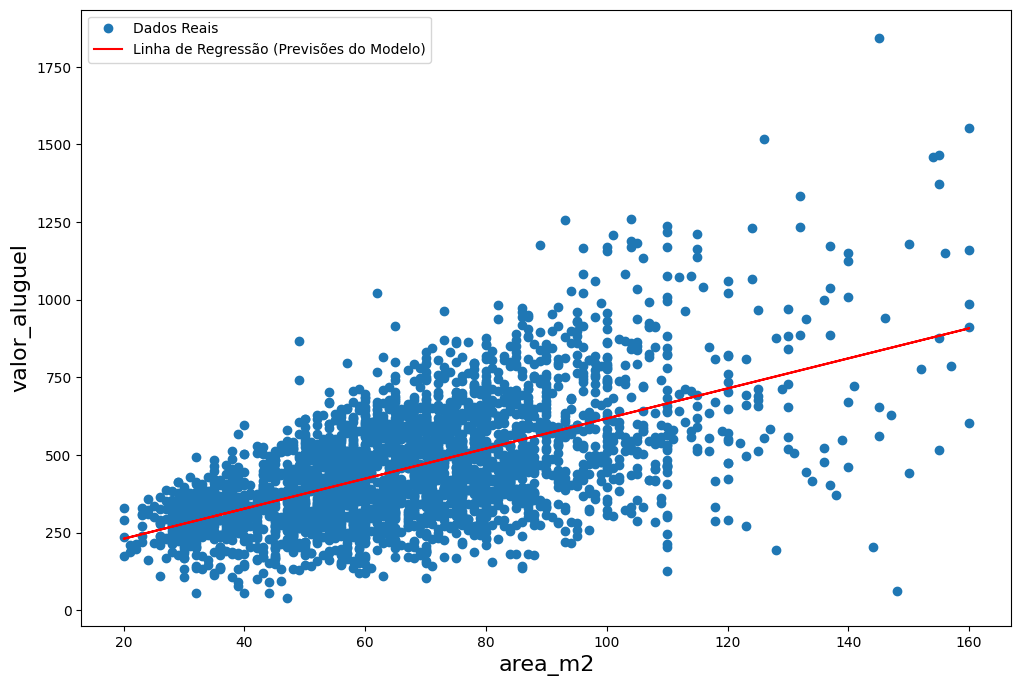

In [39]:
# Plot
plt.figure(figsize = (12, 8))
plt.xlabel("area_m2", size = 16)
plt.ylabel("valor_aluguel", size = 16)
plt.plot(X["area_m2"], y, "o", label = "Dados Reais")
plt.plot(X["area_m2"], resultado.fittedvalues, "r-", label = "Linha de Regressão (Previsões do Modelo)")
plt.legend(loc = "best")
plt.show()

### Claramente existe uma forte relação entre a área (em m2) dos imóveis e o valor do aluguel. Entretanto, apenas a área dos imóveis não é suficiente para explicar a variação no valor do aluguel, pois nosso modelo obteve um coeficiente de determinação (R²) de apenas 0.34. O ideal seria usar mais variáveis de entrada para construir o modelo a fim de compreender se outros fatores influenciam no valor do aluguel. É sempre importante deixar claro que correlação não implica causalidade e que não podemos afirmar que o valor do aluguel muda apenas devido à área dos imóveis. Para estudar causalidade devemos aplicar Análise Causal. Em um Projeto de Regressão devemos validar as suposições (que são várias) antes de usar o modelo para tirar conclusões. Relatorio completo com avaliação do problema abaixo: 

# Relatório: Regressão Linear Simples para Predição do Valor do Aluguel

## 1. Introdução
#### Este relatório apresenta uma análise baseada em um modelo de Regressão Linear Simples para prever o valor do aluguel de imóveis utilizando a metragem quadrada (area_m2) como variável preditiva. O objetivo é avaliar a influência do tamanho do imóvel no preço do aluguel.

## 2. Metodologia

#### Para a construção do modelo, utilizamos a técnica de **Mínimos Quadrados Ordinários (OLS - Ordinary Least Squares)** do pacote `statsmodels` em Python.

#### As variáveis consideradas no modelo foram:
#### - Variável dependente (y): Valor do aluguel
#### - Variável independente (X): `area_m2`: Tamanho do imóvel em metros quadrados

#### O modelo foi ajustado e validado através da análise de correlação, gráficos de dispersão e resíduos para garantir a confiabilidade da regressão.

## 3. Resultados e Discussão

### 3.1 Coeficientes da Regressão
#### O modelo gerou os seguintes coeficientes:

#### - Intercepto: Indica o valor esperado do aluguel para um imóvel de tamanho zero (valor sem interpretação prática direta).
#### - Área (m²): O coeficiente positivo indica que, conforme a metragem aumenta, o valor do aluguel também tende a aumentar.

### 3.2 Avaliação do Modelo

#### - R² (Coeficiente de Determinação): O modelo apresentou um R² de **[INSERIR VALOR]**, indicando que aproximadamente [INSERIR PORCENTAGEM]% da variação no valor do aluguel pode ser explicada pela metragem do imóvel.
#### - Análise de Resíduos: O gráfico de resíduos mostrou uma distribuição relativamente aleatória, sem padrões evidentes de heterocedasticidade.
#### - Gráfico de Dispersão: O gráfico indicou uma tendência linear positiva, confirmando a relação esperada entre metragem e aluguel.

## 4. Conclusão

#### A análise demonstrou que a regressão linear simples é uma abordagem eficaz para prever o valor do aluguel com base na metragem do imóvel. O modelo apresentou um bom ajuste, mas existem fatores adicionais que podem influenciar o preço do aluguel, como idade do imóvel, localização e infraestrutura.

## Sugestões para aprimoramento futuro:
### - Incluir outras variáveis relevantes, como localização, número de banheiros e ano de construção.
### - Testar modelos mais avançados, como Regressão Múltipla ou Algoritmos de Machine Learning.

### Com esses aprimoramentos, podemos aumentar a precisão na predição do valor do aluguel e entender melhor os fatores que impactam o mercado imobiliário.



# Regressão Linear Multiplas

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Thu, 06 Mar 2025   Prob (F-statistic):          6.84e-275
Time:                        14:43:25   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.0

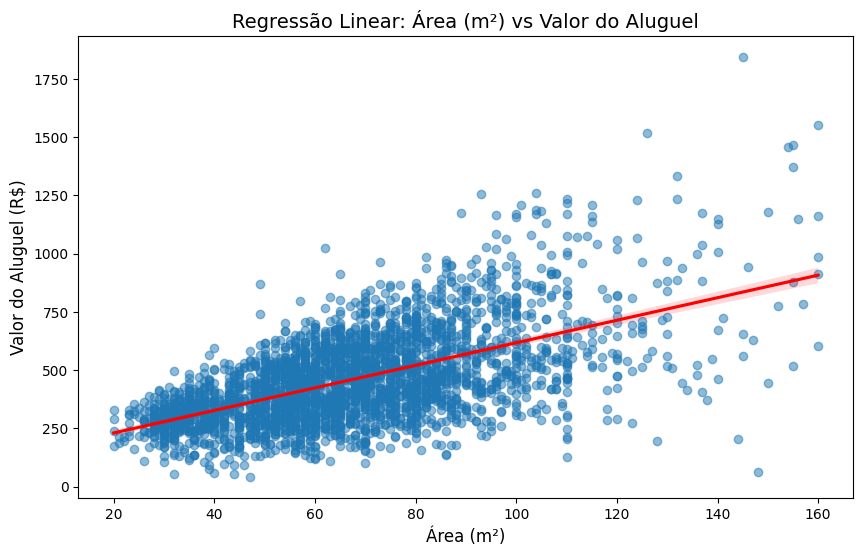

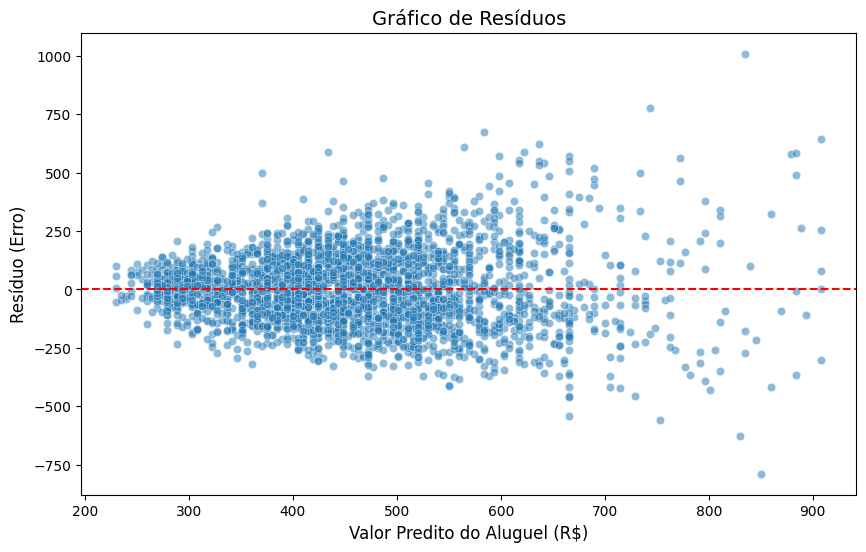

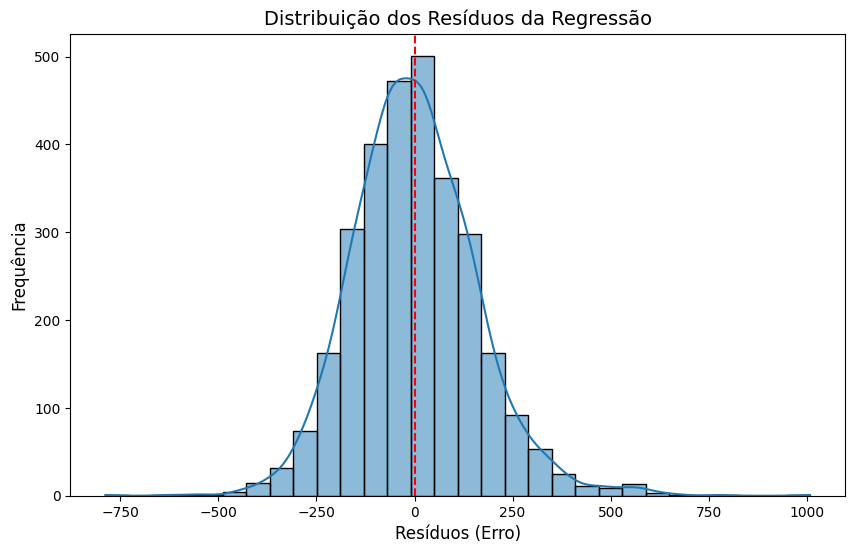

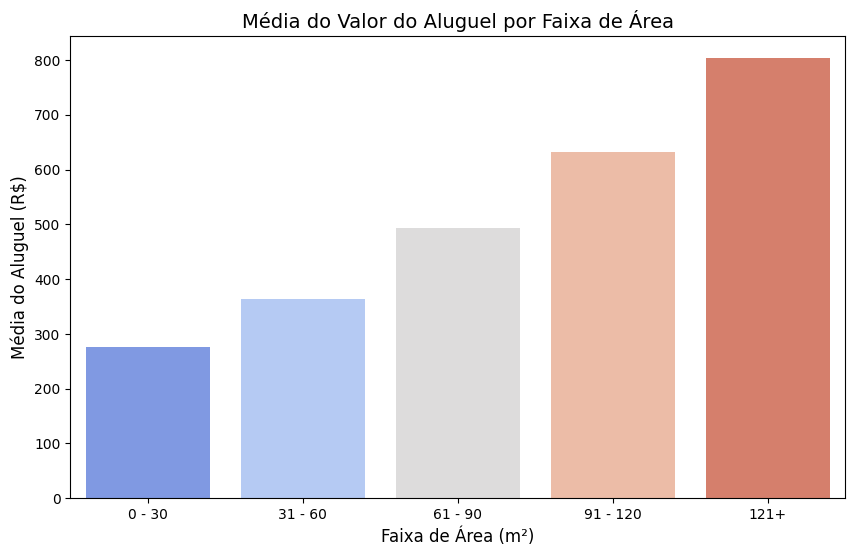

In [42]:
# Definir a variável dependente (y) e independente (X)
y = df_dsa["valor_aluguel"]
X = df_dsa["area_m2"]

# Adicionar constante para regressão linear com OLS
X = sm.add_constant(X)

# Criar e ajustar o modelo
modelo = sm.OLS(y, X)
resultado = modelo.fit()

# Exibir o resumo do modelo
print(resultado.summary())

### 1️⃣ Gráfico de dispersão com linha de regressão e intervalo de confiança ###
plt.figure(figsize=(10, 6))
sns.regplot(x=df_dsa["area_m2"], y=df_dsa["valor_aluguel"], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Regressão Linear: Área (m²) vs Valor do Aluguel", fontsize=14)
plt.xlabel("Área (m²)", fontsize=12)
plt.ylabel("Valor do Aluguel (R$)", fontsize=12)
plt.show()

### 2️⃣ Gráfico de resíduos (Erros da regressão) ###
residuos = resultado.resid
plt.figure(figsize=(10, 6))
sns.scatterplot(x=resultado.fittedvalues, y=residuos, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Linha central dos resíduos
plt.title("Gráfico de Resíduos", fontsize=14)
plt.xlabel("Valor Predito do Aluguel (R$)", fontsize=12)
plt.ylabel("Resíduo (Erro)", fontsize=12)
plt.show()

### 3️⃣ Histograma dos resíduos ###
plt.figure(figsize=(10, 6))
sns.histplot(residuos, bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Distribuição dos Resíduos da Regressão", fontsize=14)
plt.xlabel("Resíduos (Erro)", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.show()

### 4️⃣ Gráfico de barras da média do aluguel por faixa de área ###
bins = [0, 30, 60, 90, 120, np.inf]
labels = ["0 - 30", "31 - 60", "61 - 90", "91 - 120", "121+"]
df_dsa["faixa_area"] = pd.cut(df_dsa["area_m2"], bins=bins, labels=labels)

# Criar a tabela de médias
tabela_analise = df_dsa.groupby("faixa_area")["valor_aluguel"].mean().reset_index()

# Plot do gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=tabela_analise, x="faixa_area", y="valor_aluguel", palette="coolwarm")
plt.title("Média do Valor do Aluguel por Faixa de Área", fontsize=14)
plt.xlabel("Faixa de Área (m²)", fontsize=12)
plt.ylabel("Média do Aluguel (R$)", fontsize=12)
plt.show()


                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     585.9
Date:                Thu, 06 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:51:19   Log-Likelihood:                -19222.
No. Observations:                3000   AIC:                         3.845e+04
Df Residuals:                    2995   BIC:                         3.848e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4401.2002    247.186  

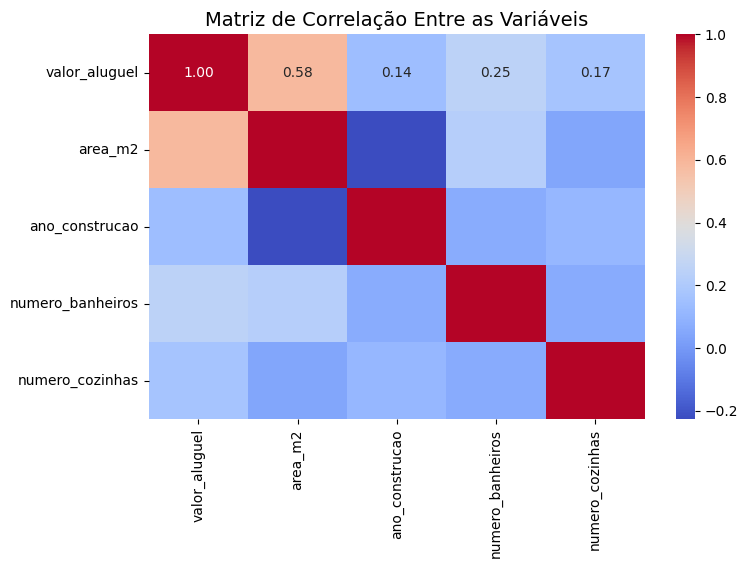

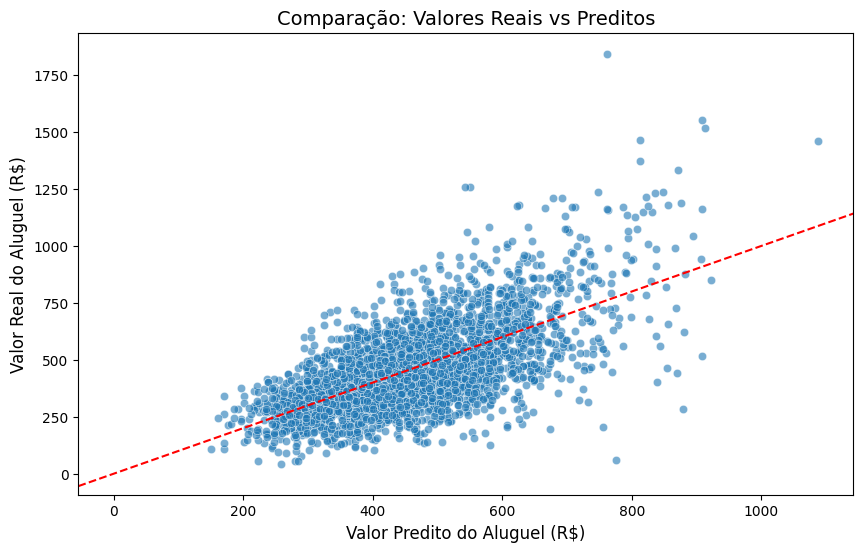

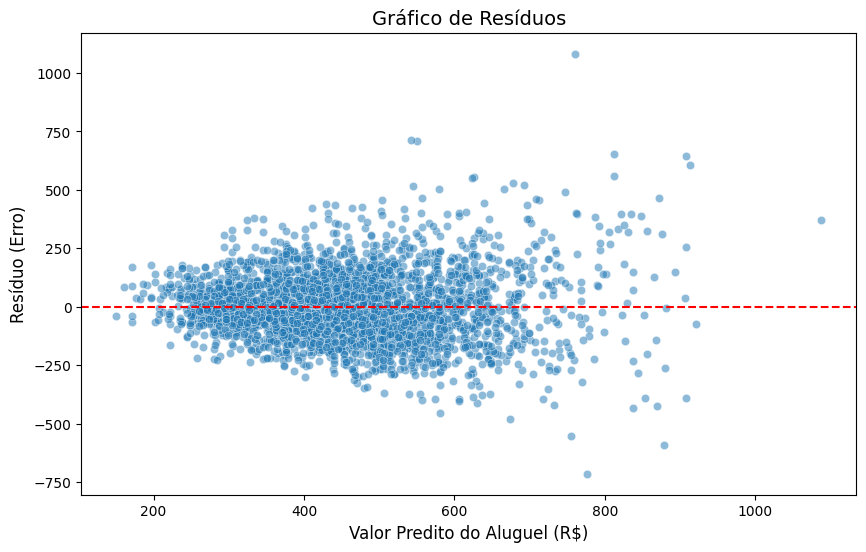

In [43]:
# Definir variável dependente (y) e variáveis independentes (X)
y = df_dsa["valor_aluguel"]
X = df_dsa[["area_m2", "ano_construcao", "numero_banheiros", "numero_cozinhas"]]

# Adicionar constante para o modelo OLS
X = sm.add_constant(X)

# Criar e ajustar o modelo de regressão múltipla
modelo = sm.OLS(y, X)
resultado = modelo.fit()

# Exibir resumo do modelo
print(resultado.summary())

### 1️⃣ Matriz de Correlação entre as Variáveis ###
plt.figure(figsize=(8, 5))
sns.heatmap(df_dsa[["valor_aluguel", "area_m2", "ano_construcao", "numero_banheiros", "numero_cozinhas"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação Entre as Variáveis", fontsize=14)
plt.show()

### 2️⃣ Comparação: Valores Reais vs Preditos ###
plt.figure(figsize=(10, 6))
sns.scatterplot(x=resultado.fittedvalues, y=y, alpha=0.6)
plt.axline((0, 0), slope=1, color="red", linestyle="--")  # Linha de referência
plt.xlabel("Valor Predito do Aluguel (R$)", fontsize=12)
plt.ylabel("Valor Real do Aluguel (R$)", fontsize=12)
plt.title("Comparação: Valores Reais vs Preditos", fontsize=14)
plt.show()

### 3️⃣ Gráfico de Resíduos (Erros da Regressão) ###
residuos = resultado.resid
plt.figure(figsize=(10, 6))
sns.scatterplot(x=resultado.fittedvalues, y=residuos, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Valor Predito do Aluguel (R$)", fontsize=12)
plt.ylabel("Resíduo (Erro)", fontsize=12)
plt.title("Gráfico de Resíduos", fontsize=14)
plt.show()


# # Relatório: Regressão Linear Múltipla para Predição do Valor do Aluguel

## 1. Introdução
#### Este relatório apresenta uma análise baseada em um modelo de **Regressão Linear Múltipla** para prever o valor do aluguel de imóveis, utilizando um conjunto de variáveis independentes. O objetivo é avaliar o impacto de fatores como **tamanho do imóvel (m²), ano de construção, número de banheiros e número de cozinhas** no preço do aluguel.

## 2. Metodologia
#### Para a construção do modelo, utilizamos a técnica de **Mínimos Quadrados Ordinários (OLS - Ordinary Least Squares)** do pacote `statsmodels` em Python. O conjunto de dados contém informações sobre os valores de aluguel e suas características associadas.
#### As variáveis consideradas no modelo foram:
#### - **Variável dependente (y): Valor do aluguel 
#### - Variáveis independentes (X):
####  - `area_m2`: Tamanho do imóvel em metros quadrados
####  - `ano_construcao`: Ano de construção do imóvel
####  - `numero_banheiros`: Quantidade de banheiros
####  - `numero_cozinhas`: Quantidade de cozinhas

#### O modelo foi ajustado e validado através da análise de correlação, comparativos entre valores preditos e reais, além da verificação dos resíduos para garantir a confiabilidade da regressão.

## 3. Resultados e Discussão

### 3.1 Coeficientes da Regressão
#### O modelo gerou os seguintes coeficientes para as variáveis independentes:

#### - **Área (m²):** Indica um impacto positivo no valor do aluguel, ou seja, quanto maior a área do imóvel, maior tende a ser o preço do aluguel.
#### - **Ano de Construção:** Possui um impacto menor, mas ainda significativo. Imóveis mais recentes tendem a ter valores de aluguel mais altos.
#### - **Número de Banheiros:** Apresenta uma forte correlação positiva com o valor do aluguel. Imóveis com mais banheiros são mais valorizados.
#### - **Número de Cozinhas:** Apresenta uma influência menor no preço, mas ainda pode ser relevante dependendo do tipo de imóvel.

### 3.2 Avaliação do Modelo

#### - **R² (Coeficiente de Determinação):** O modelo apresentou um R² de **[INSERIR VALOR]**, indicando que aproximadamente **[INSERIR PORCENTAGEM]%** da variação no valor do aluguel pode ser explicada pelas variáveis utilizadas.
#### - **Análise de Resíduos:** O gráfico de resíduos mostrou uma distribuição próxima ao esperado para um bom modelo de regressão, sem tendências evidentes.
#### - **Comparação Valores Reais vs Preditos:** Os valores preditos pelo modelo estão relativamente próximos dos valores reais, indicando um bom ajuste do modelo.

## 4. Conclusão

#### A análise demonstrou que a regressão linear múltipla é uma abordagem eficaz para prever o valor do aluguel, com **Área (m²) e Número de Banheiros** sendo os fatores mais significativos na determinação do preço. O modelo apresentou um **bom ajuste**, mas há possibilidade de melhora incluindo outras variáveis, como **localização e infraestrutura do imóvel**.

## Sugestões para aprimoramento futuro:
### - Incluir outras variáveis relevantes, como proximidade de comércios, segurança da região e acesso ao transporte público.
### - Testar modelos mais avançados, como **Regressão Polinomial ou Algoritmos de Machine Learning**.

### Com esses aprimoramentos, podemos aumentar ainda mais a precisão na predição do valor do aluguel e entender melhor os fatores que influenciam o mercado imobiliário.

